In [2]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

from pylab import rcParams
rcParams['figure.figsize'] = 30, 15

In [3]:
dim1 = (90,100)
dim2 = dim1[::-1]
flat = dim1[0]*dim1[1]

In [4]:
def process_image(image):
    return cv2.resize(cv2.normalize(cv2.imread(image,0), None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F),dim1)


In [5]:
def load_image(image):
    return process_image(image).flatten()

In [6]:
def print_image(image):
    sample = load_image(image)
    sample_array = np.reshape(sample,(1,flat))
    projected = (np.matmul(sample_array,projection)+mean)*255.0
    recon_image = np.reshape(projected,dim2)
    return recon_image

In [7]:
data_original = np.load('images.npy')
mean = np.mean(data_original,axis=0)
data = np.reshape(data_original - mean,data_original.shape)

In [101]:
cov = np.cov(data,rowvar=False)
print(cov.shape)
eValues, eVectors = np.linalg.eigh(cov)

(9000, 9000)


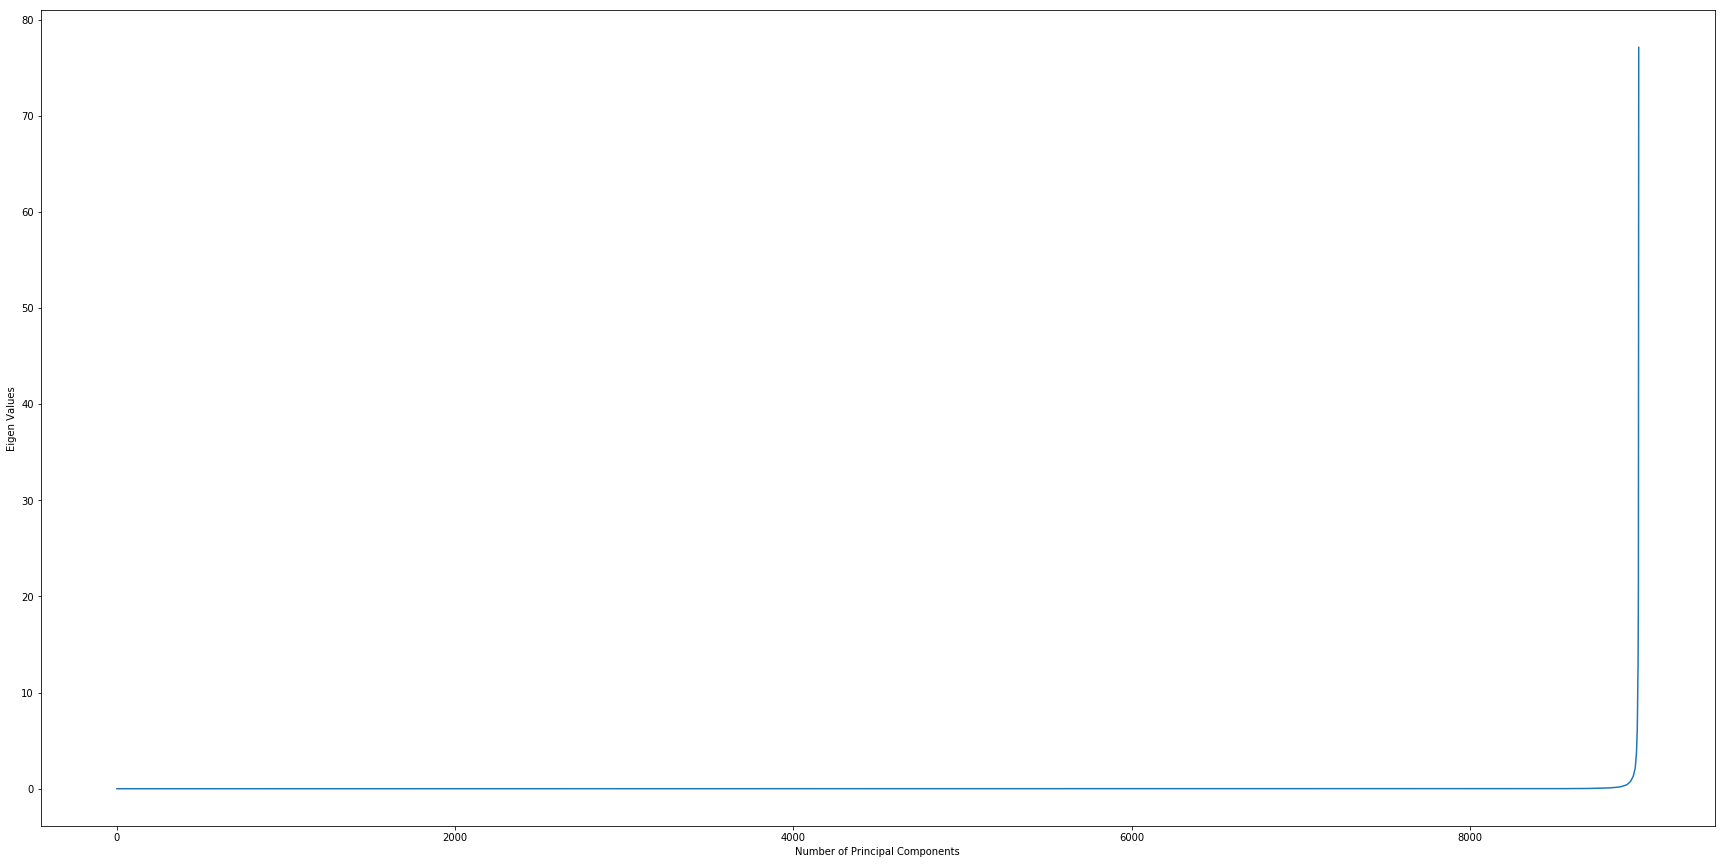

In [102]:
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigen Values')
plt.plot(eValues)
combined = []
for i in range(len(eValues)):
    combined.append((eValues[i],eVectors[i]))
combined.sort(key = lambda x : x[0],reverse=True)

In [103]:
np.save('eigen_male',combined)

In [8]:
combined = np.load('eigen.npy',allow_pickle=True)

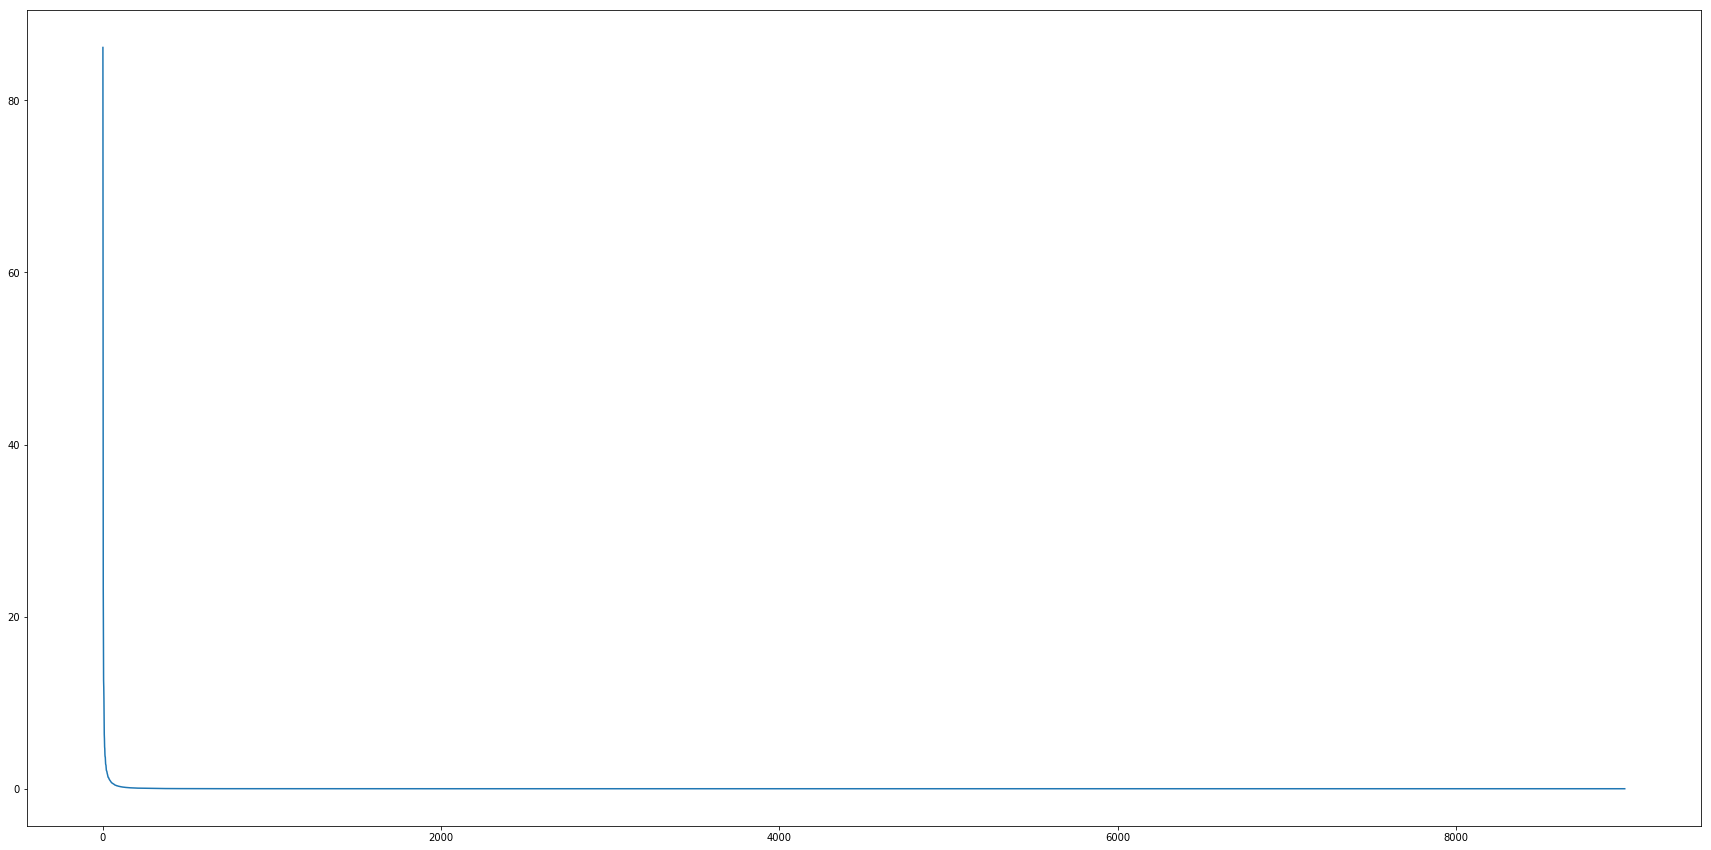

In [9]:
eValues = [i for i,j in combined]
plt.plot(eValues)

In [41]:
number = 300
vectors = []
for i in range(400,1000):
    vectors.append(combined[i][1])
#     print combined[i][1].shape
principalComponents = np.array(vectors)
print(principalComponents.shape)
projection = np.matmul(principalComponents.T,principalComponents)

(600, 9000)


In [42]:
def print_image(image):
    sample = load_image(image)
    sample_array = np.reshape(sample,(1,flat))
    projected = (np.matmul(sample_array-mean,projection)+mean)*255.0
    recon_image = np.reshape(projected,dim2)
    return recon_image

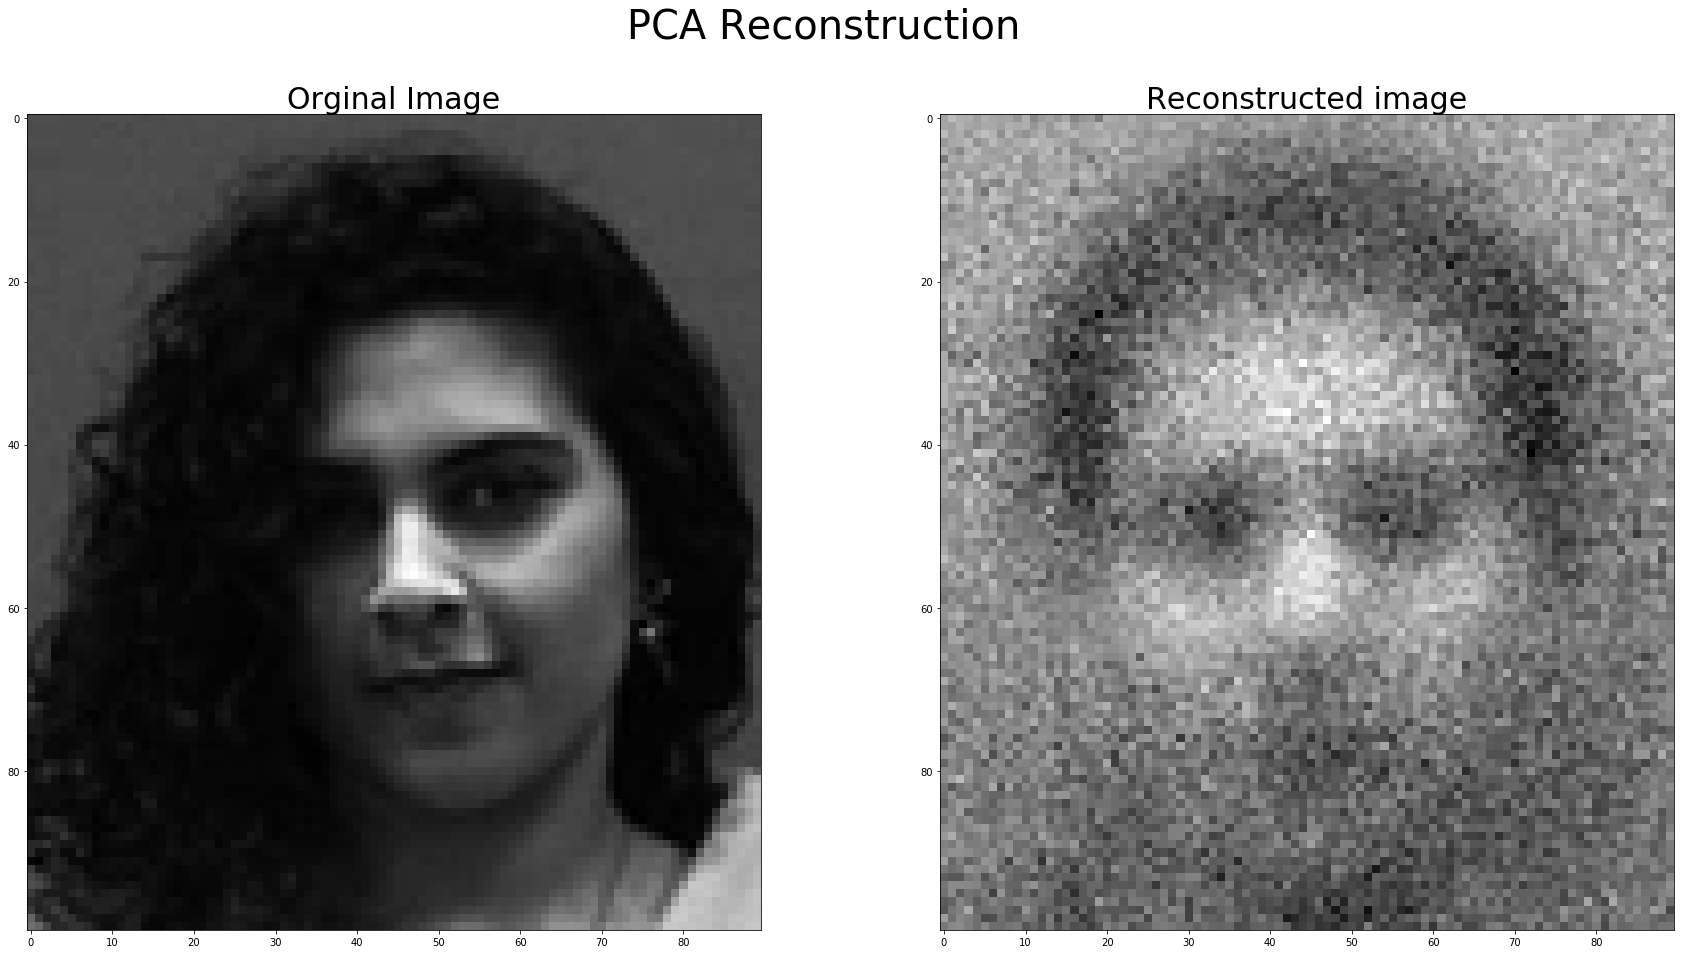

In [43]:
img = 'sample.jpg'
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('PCA Reconstruction', fontsize=40)
ax1.set_title('Orginal Image', fontsize=30)
im1 = ax1.imshow(process_image(img), cmap='gray')
ax2.set_title('Reconstructed image', fontsize=30)
im2 = ax2.imshow(print_image(img), cmap='gray')
plt.show()

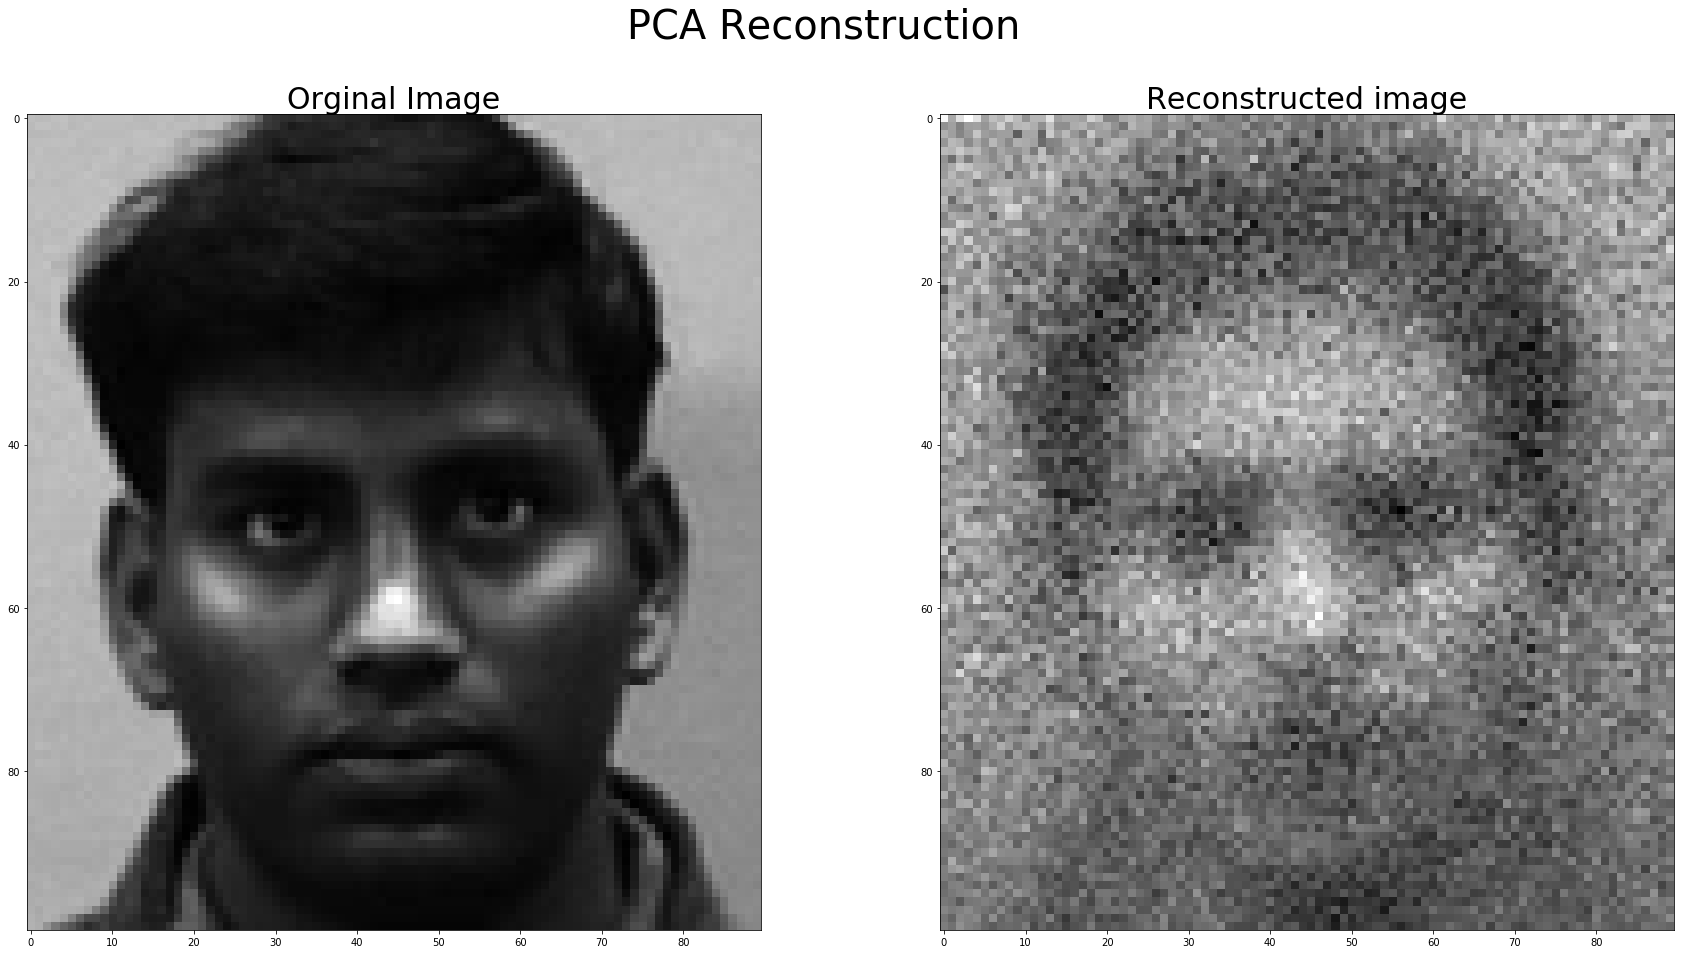

In [15]:
img = 'sample2.jpg'
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('PCA Reconstruction', fontsize=40)
ax1.set_title('Orginal Image', fontsize=30)
im1 = ax1.imshow(process_image(img), cmap='gray')
ax2.set_title('Reconstructed image', fontsize=30)
im2 = ax2.imshow(print_image(img), cmap='gray')
plt.show()

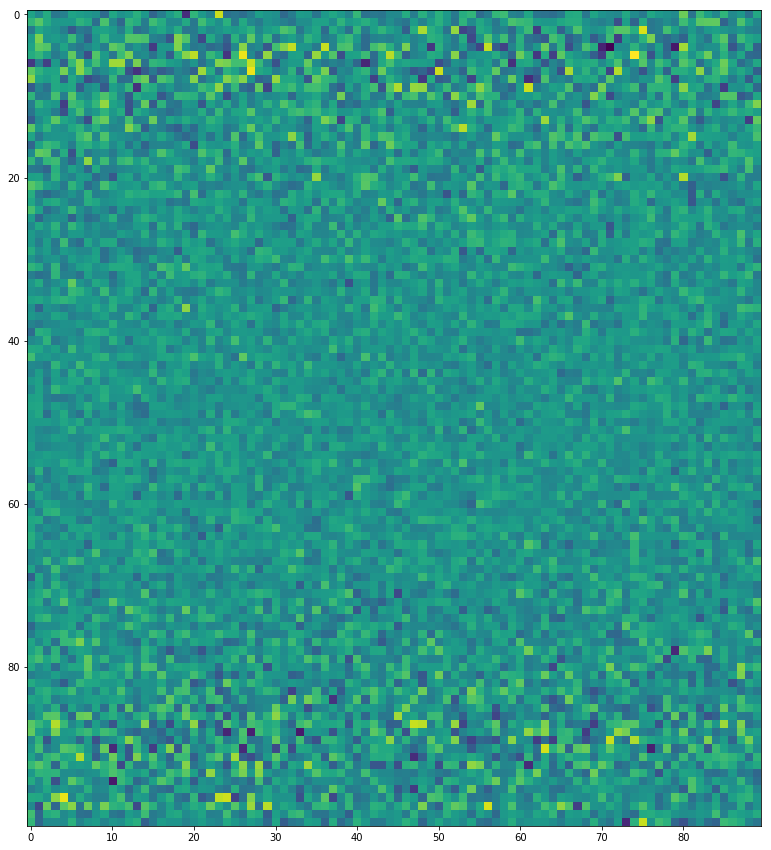

In [93]:
eig1 = np.reshape(combined[0][1],dim2)
plt.imshow(eig1)